In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
pd.set_option('display.max_columns', None)# 显示所有列
pd.set_option('display.max_rows', 200) # 最多显示200行

In [66]:
data = pd.read_csv("modelData/veg0.csv")
data

,x,l0,l1,l2,l3,l4,l5,l6
0,0,3.53613,3.53613,3.53613,3.53613,3.53613,3.53613,3.53613
1,10,3.54399,3.54399,3.54399,3.54399,3.54399,3.54399,3.54399
2,20,3.55206,3.55206,3.55206,3.55206,3.55206,3.55206,3.55206
3,30,3.56071,3.56071,3.56071,3.56071,3.56071,3.56071,3.56071
4,40,3.56942,3.56942,3.56943,3.56943,3.56943,3.56942,3.56942
5,50,3.57812,3.57812,3.57812,3.57812,3.57812,3.57812,3.57812
6,60,3.58723,3.58723,3.58724,3.58724,3.58724,3.58723,3.58723
7,70,3.59614,3.59614,3.59615,3.59615,3.59615,3.59614,3.59614
8,80,3.60469,3.60469,3.60469,3.60469,3.60469,3.60469,3.60469
9,90,3.61327,3.61327,3.61328,3.61328,3.61328,3.61327,3.61327


In [67]:
l0=data['l0']   
l1=data['l1']  
l2=data['l2']  
l3=data['l3'] 
l4=data['l4']
l5=data['l5']
l6=data['l6'] 


In [68]:
nx = 30 +1
ny = 6+1
xlength = 300
ylength = 3000 

In [69]:
x = np.linspace(0,xlength, nx)
y = np.linspace(0,ylength, ny)

In [70]:
x,x.shape,y,y.shape

(array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300.]),
 (31,),
 array([   0.,  500., 1000., 1500., 2000., 2500., 3000.]),
 (7,))

In [71]:
X, Y = np.meshgrid(x, y)
X.shape, Y.shape

((7, 31), (7, 31))

In [72]:
Z=(np.zeros(nx*ny).reshape(nx,ny)).T

In [73]:
Z,Z.shape

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]

In [74]:
Z[0,:]  = l0
Z[1,:]  = l1
Z[2,:]  = l2
Z[3,:]  = l3
Z[4,:]  = l4
Z[5,:]  = l5
Z[6,:]  = l6
Z

array([[3.53613, 3.54399, 3.55206, 3.56071, 3.56942, 3.57812, 3.58723,
        3.59614, 3.60469, 3.61327, 3.62103, 3.62826, 3.63383, 3.63781,
        3.63861, 3.63588, 3.62804, 3.61223, 3.58744, 3.54834, 3.49184,
        3.41352, 3.30647, 3.16562, 2.98646, 2.76204, 2.49232, 2.22271,
        1.97496, 1.70032, 1.70032],
       [3.53613, 3.54399, 3.55206, 3.56071, 3.56942, 3.57812, 3.58723,
        3.59614, 3.60469, 3.61327, 3.62103, 3.62826, 3.63383, 3.63781,
        3.63861, 3.63588, 3.62804, 3.61223, 3.58744, 3.54834, 3.49184,
        3.41352, 3.30647, 3.16562, 2.98646, 2.76204, 2.49232, 2.22271,
        1.97496, 1.72682, 1.72682],
       [3.53613, 3.54399, 3.55206, 3.56071, 3.56943, 3.57812, 3.58724,
        3.59615, 3.60469, 3.61328, 3.62104, 3.62828, 3.63385, 3.63783,
        3.63864, 3.63591, 3.62808, 3.61228, 3.58749, 3.54838, 3.49189,
        3.41356, 3.30651, 3.16565, 2.98649, 2.76206, 2.49234, 2.22272,
        1.97498, 1.72682, 1.72682],
       [3.53613, 3.54399, 3.55206, 3.560

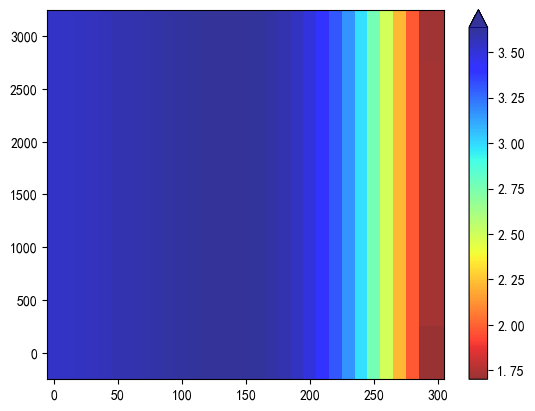

In [86]:
plt.pcolormesh(X, Y, Z, cmap='jet_r',alpha=0.8)
plt.colorbar(extend='max')

In [65]:
Z[0,10]

2.48873